## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\omdes\Desktop\data\teks\All_data_sets\imdb_top_2000_movies.csv')

In [4]:
df.head()

Movie Name Release Year  Duration  IMDB Rating  Metascore  \
0          The Godfather         1972       175          9.2      100.0   
1  The Godfather Part II         1974       202          9.0       90.0   
2        Ordinary People         1980       124          7.7       86.0   
3     Lawrence of Arabia         1962       218          8.3      100.0   
4             Straw Dogs         1971       113          7.4       73.0   

       Votes                        Genre              Director  \
0  2,002,655                 Crime, Drama  Francis Ford Coppola   
1  1,358,608                 Crime, Drama  Francis Ford Coppola   
2     56,476                        Drama        Robert Redford   
3    313,044  Adventure, Biography, Drama            David Lean   
4     64,331       Crime, Drama, Thriller         Sam Peckinpah   

                Cast     Gross  
0      Marlon Brando  $134.97M  
1          Al Pacino   $57.30M  
2  Donald Sutherland   $54.80M  
3      Peter O'Toole   $44.82M  
4     Dustin Hoffman       NaN

In [5]:
df.shape

(2000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


## Data cleaning

In [7]:
df.shape

(2000, 10)

In [8]:
g=df['Gross']

In [9]:
count=0
nan=0
oth=0
for i in g:
    i=str(i)
    if i[-1] =='M':
        count+=1
    elif i =='nan':
        nan+=1
    else:
        oth+=1
        print(i[-1])

print('number of M values:',count)
print()
print('number of nan values:',nan)
print()
print('number of other values',oth)

number of M values: 1903

number of nan values: 97

number of other values 0


In [10]:
gn=[]
for i in g:
    i=str(i)
    i= i[1:-1]
    if i=='a':
        i=None
    else:
        i=float(i)*1000000
        i=int(i)
    gn.append(i)

In [11]:
df['Gross']=gn

In [12]:
df['Gross']

0       134970000.0
1        57300000.0
2        54800000.0
3        44820000.0
4               NaN
           ...     
1995     11000000.0
1996     60020000.0
1997     33310000.0
1998     15280000.0
1999     31690000.0
Name: Gross, Length: 2000, dtype: float64

In [13]:
v=df['Votes']

In [14]:
vn=[]
for i in v:
    a=i.split(',')
    i=''.join(a)
    vn.append(int(i))

In [15]:
df['Votes']=vn

In [16]:
df['Votes']

0       2002655
1       1358608
2         56476
3        313044
4         64331
         ...   
1995      66235
1996      49527
1997      67318
1998      75956
1999      77075
Name: Votes, Length: 2000, dtype: int64

In [17]:
df[df['Gross'].isnull() & df['Metascore'].isnull()]

Movie Name   Release Year  Duration  \
28                             Fahrenheit 451           1966       112   
71                    The Man from U.N.C.L.E.      1964–1968        50   
90                         Fate Is the Hunter           1964       106   
179                                 La strada           1954       108   
209          Salò o le 120 giornate di Sodoma           1975       117   
569                                     MADtv      1995–2016        60   
752           The Lion King II: Simba's Pride     1998 Video        81   
918                      Yeopgijeogin geunyeo           2001       137   
940                                    Eskiya           1996       128   
946                                       Gia  1998 TV Movie       120   
952                 Pirates of Silicon Valley  1999 TV Movie        95   
999                                Conspiracy  2001 TV Movie        96   
1147                                 The Hole           2001       102   
1193                      Munna Bhai M.B.B.S.           2003       156   
1361                            The Sandlot 2     2005 Video        97   
1414                                  Shutter        II 2004        97   
1427                      High School Musical  2006 TV Movie        98   
1436                                Band Camp     2005 Video        87   
1492               Keloglan Karaprens'e Karsi           2006       105   
1495                                 Bandidas           2006        93   
1556                       The Man from Earth           2007        87   
1600                           Trick 'r Treat           2007        82   
1602                    It's a Boy Girl Thing           2006        95   
1643                            À l'intérieur           2007        82   
1657                            Planet Terror           2007       105   
1670                                    Chaos        II 2005       106   
1671                              A Wednesday           2008       104   
1678                                  Martyrs           2008        99   
1681                               Beta House     2007 Video        85   
1687                              Death Proof           2007       127   
1690                    High School Musical 2  2007 TV Movie       104   
1700                           The Naked Mile     2006 Video        97   
1725                                Camp Rock  2008 TV Movie        94   
1736            Dünyayi Kurtaran Adam'in Oglu           2006       110   
1737                 Emret Komutanim: Sah Mat           2007       100   
1738                           Çilgin Dersane           2007       100   
1817                           Temple Grandin  2010 TV Movie       107   
1832  American Pie Presents: The Book of Love     2009 Video        93   
1859                            Mary and Max.           2009        92   
1890                      Hachi: A Dog's Tale           2009        93   
1892                                     Exam           2009       101   
1909                                 Triangle           2009        99   
1927       Angus, Thongs and Perfect Snogging           2008       100   
1931               Birdemic: Shock and Terror           2010       105   
1933                              Srpski film           2010       104   
1940                         Thick as Thieves         I 2009       104   
1943                              Unthinkable           2010        97   
1946                  Rise of the Footsoldier           2007       119   

      IMDB Rating  Metascore   Votes                        Genre  \
28            7.2        NaN   45330                Drama, Sci-Fi   
71            7.7        NaN    6227     Action, Adventure, Crime   
90            6.8        NaN    1883     Drama, Mystery, Thriller   
179           8.0        NaN   66412                        Drama   
209           5.8        NaN   65534                        Dra

In [18]:
df.drop(df[df['Gross'].isnull() & df['Metascore'].isnull()].index, inplace=True)

In [19]:
df.isnull().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       33
Votes            0
Genre            0
Director         0
Cast             0
Gross           49
dtype: int64

In [20]:
a=['Gross','Metascore']

for i in a:
    df[i]=df[i].fillna(value=df[i].mean())

In [21]:
df['Gross'].mean()

66186358.3657383

In [22]:
df.isnull().sum()

Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64

In [23]:
l=df['Release Year']

In [24]:
count = 0
for i in l:
    try:
        i = int(i)  
    except ValueError:  
        print('cound not change:'+i)

cound not change:I 1987
cound not change:I 1990
cound not change:I 1995
cound not change:I 1996
cound not change:I 1995
cound not change:I 1999
cound not change:I 1998
cound not change:I 1999
cound not change:I 1998
cound not change:I 1999
cound not change:I 2000
cound not change:I 2003
cound not change:I 2002
cound not change:I 2004
cound not change:I 2003
cound not change:I 2004
cound not change:I 2004
cound not change:I 2004
cound not change:I 2004
cound not change:I 2005
cound not change:I 2005
cound not change:I 2005
cound not change:I 2005
cound not change:I 2006
cound not change:I 2006
cound not change:I 2006
cound not change:I 2006
cound not change:I 2007
cound not change:I 2008
cound not change:I 2007
cound not change:I 2008
cound not change:I 2007
cound not change:I 2007
cound not change:I 2008
cound not change:I 2007
cound not change:I 2007
cound not change:I 2008
cound not change:I 2009
cound not change:I 2009
cound not change:I 2008
cound not change:I 2009
cound not change

In [25]:
n=[]
for i in l:
    if i[:2]=='I ':
        i=int(i[2:])
    elif i[:3]=='II ':
        i=int(i[3:])

    else:
        i=int(i)
    n.append(i)    

In [26]:
df['Release Year']=n

In [27]:
df['Release Year']

0       1972
1       1974
2       1980
3       1962
4       1971
        ... 
1995    2009
1996    2010
1997    2009
1998    2009
1999    2008
Name: Release Year, Length: 1952, dtype: int64

## Data Visualization

In [28]:
top_cast = df['Cast'].value_counts().nlargest(10).index
filtered_df = df[df['Cast'].isin(top_cast)]

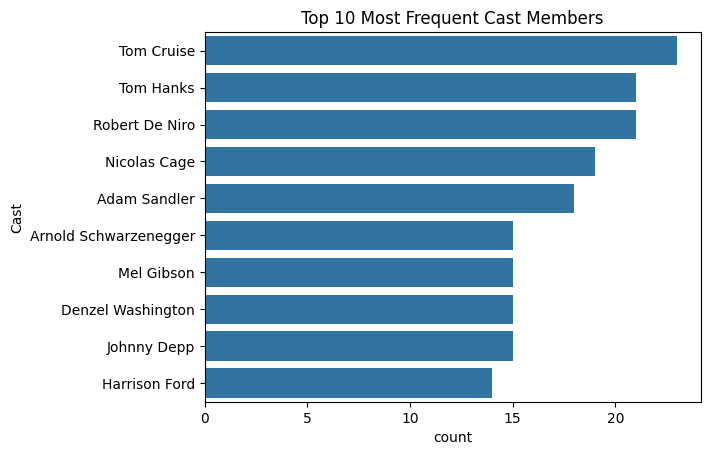

In [29]:
sns.countplot(y='Cast', data=filtered_df, order=top_cast)
plt.title('Top 10 Most Frequent Cast Members')
plt.show()

In [30]:
top_directors = df['Director'].value_counts().nlargest(10)

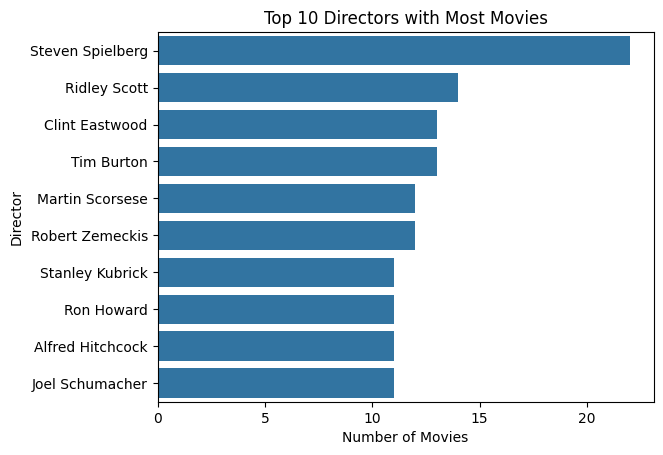

In [31]:
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors with Most Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

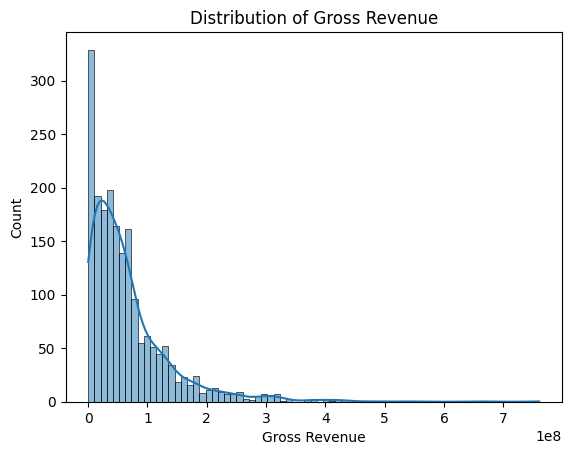

In [32]:
sns.histplot(df['Gross'],kde=True)
plt.title("Distribution of Gross Revenue")
plt.xlabel("Gross Revenue")
plt.ylabel("Count")
plt.show()

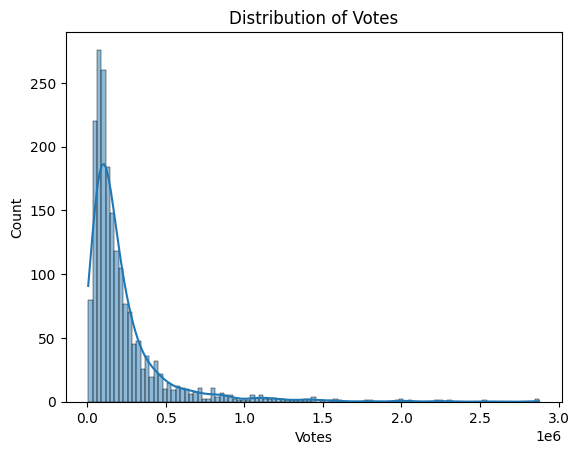

In [33]:
sns.histplot(df['Votes'],kde=True)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()

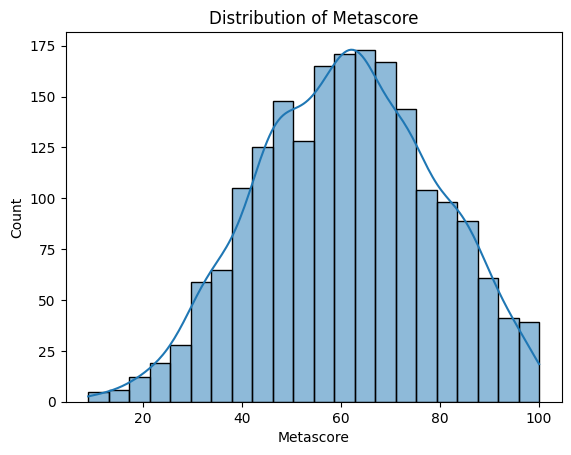

In [34]:
sns.histplot(df['Metascore'],kde=True)
plt.title("Distribution of Metascore")
plt.xlabel("Metascore")
plt.ylabel("Count")
plt.show()

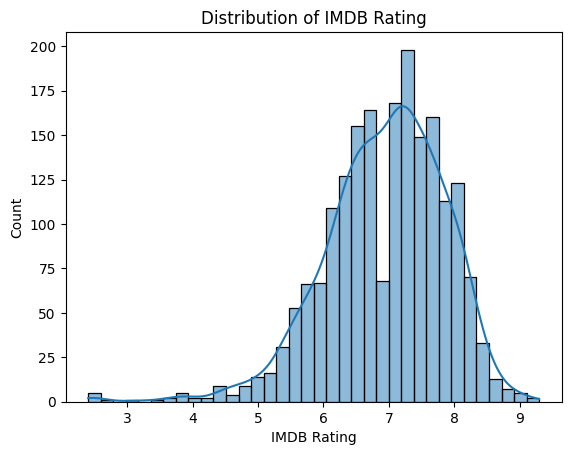

In [35]:
sns.histplot(df['IMDB Rating'],kde=True)
plt.title("Distribution of IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Count")
plt.show()

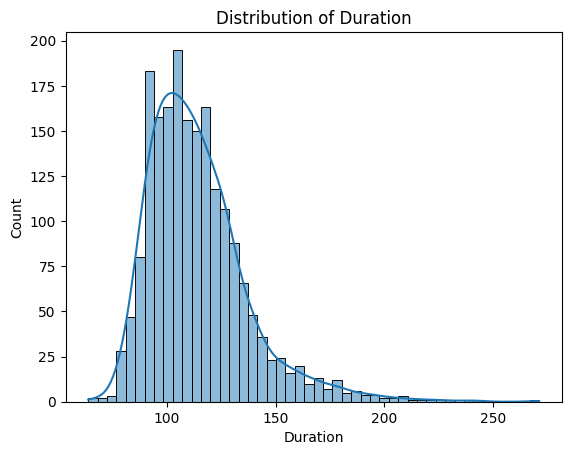

In [36]:
sns.histplot(df['Duration'],kde=True)
plt.title("Distribution of Duration")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

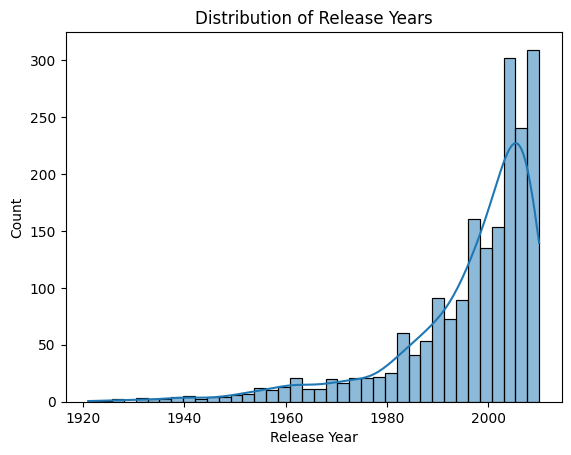

In [37]:
sns.histplot(df['Release Year'],kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

In [38]:
top_Genre = df['Genre'].value_counts().nlargest(10)

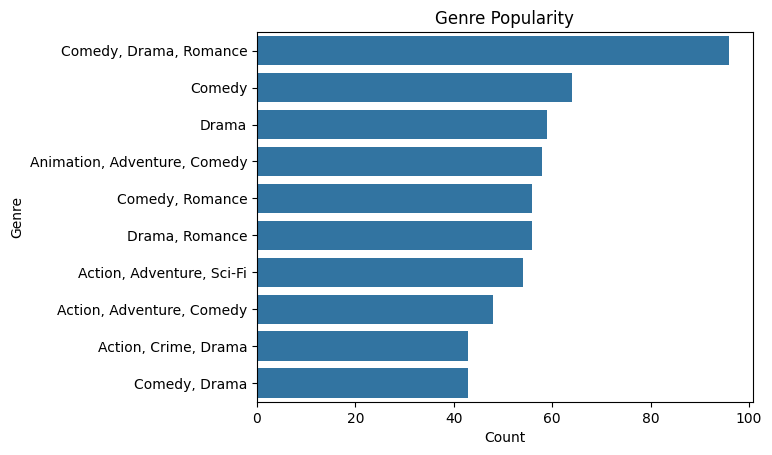

In [39]:
sns.barplot(x=top_Genre.values, y=top_Genre.index)
plt.title("Genre Popularity")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [40]:
df1=df.drop(columns='Movie Name')
le=LabelEncoder()

a=df1.select_dtypes(include='object')
for i in a:
    df1[i]=le.fit_transform(df1[i])

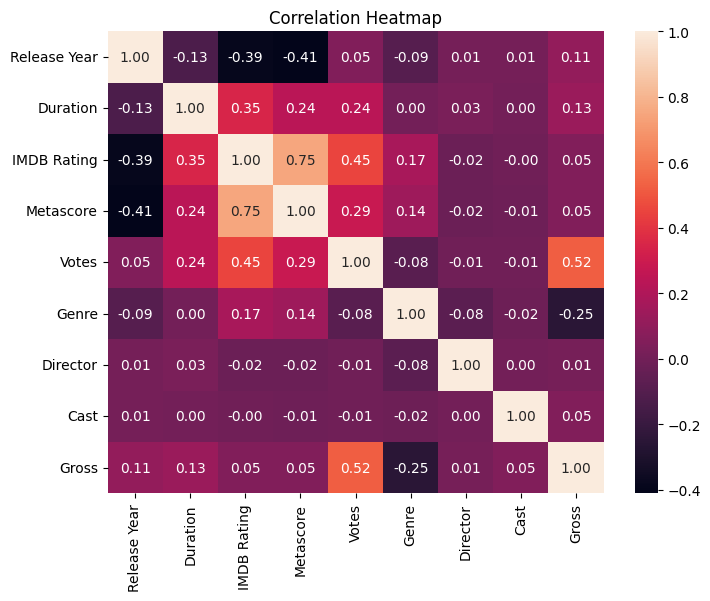

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

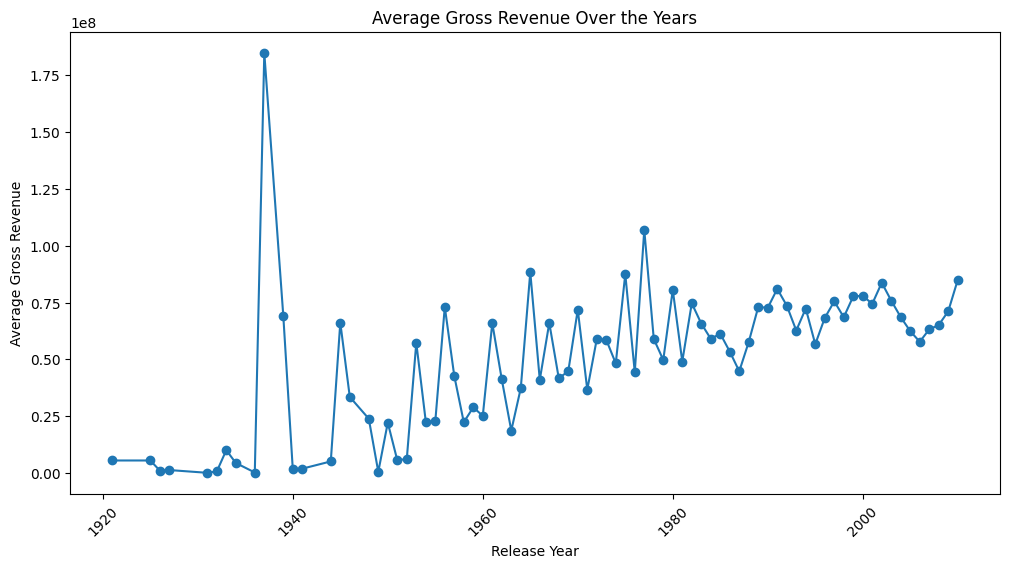

In [42]:
gross_by_year = df.groupby('Release Year')['Gross'].mean()
plt.figure(figsize=(12, 6))
gross_by_year.plot(kind='line', marker='o')
plt.title("Average Gross Revenue Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Gross Revenue")
plt.xticks(rotation=45)
plt.show()

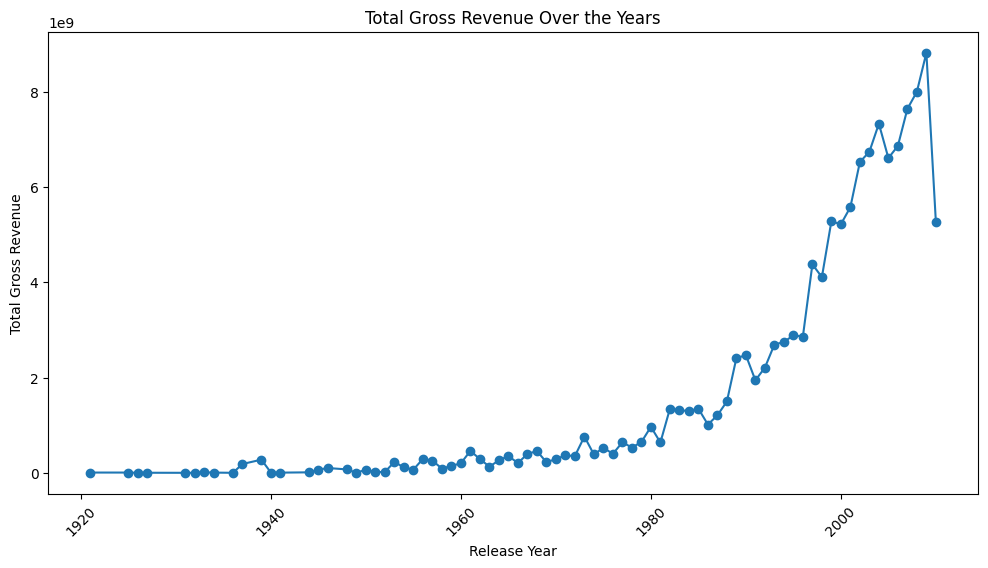

In [43]:
gross_by_year = df.groupby('Release Year')['Gross'].sum()
plt.figure(figsize=(12, 6))
gross_by_year.plot(kind='line', marker='o')
plt.title("Total Gross Revenue Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Total Gross Revenue")
plt.xticks(rotation=45)
plt.show()

In [44]:
top_movies = df.nlargest(10, 'Gross')[['Movie Name', 'Gross']]

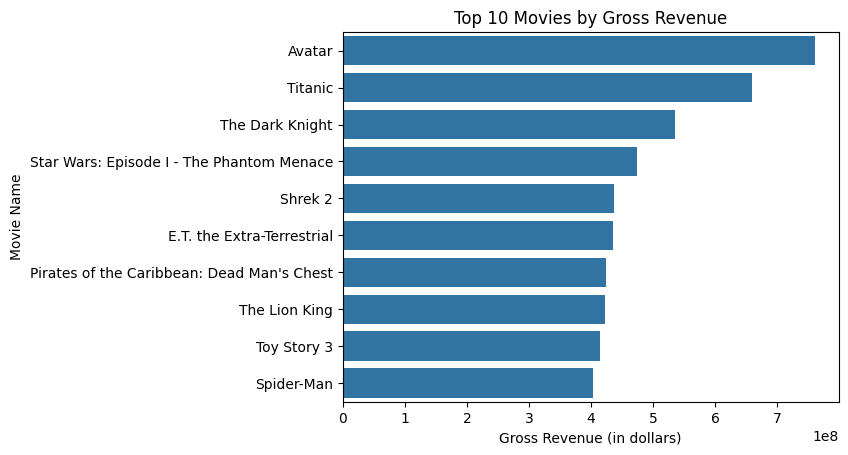

In [45]:
sns.barplot(x='Gross', y='Movie Name', data=top_movies)
plt.title("Top 10 Movies by Gross Revenue")
plt.xlabel("Gross Revenue (in dollars)")
plt.ylabel("Movie Name")
plt.show()

In [46]:
bottom_movies = df.nsmallest(10, 'Gross')[['Movie Name', 'Gross']]

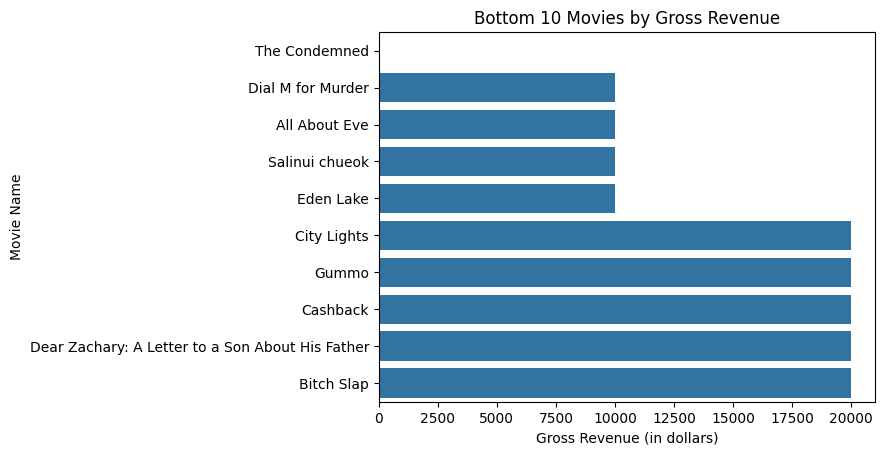

In [47]:
sns.barplot(x='Gross', y='Movie Name', data=bottom_movies)
plt.title("Bottom 10 Movies by Gross Revenue")
plt.xlabel("Gross Revenue (in dollars)")
plt.ylabel("Movie Name")
plt.show()

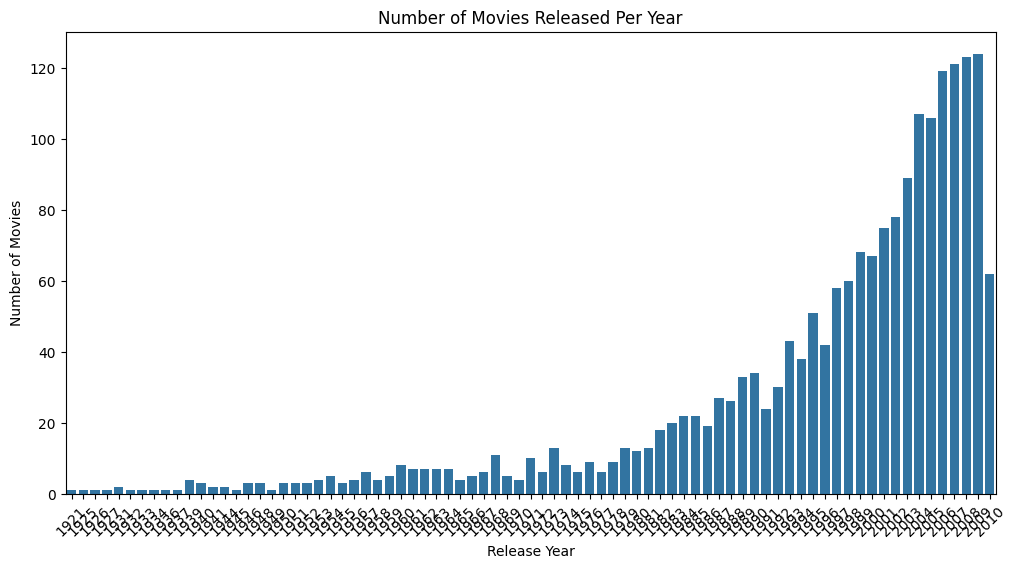

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Release Year', order=sorted(df['Release Year']))
plt.title("Number of Movies Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

In [49]:
top_gross_per_genre = df.groupby('Genre')['Gross'].sum()
top_gross_per_genre_sorted = top_gross_per_genre.sort_values(ascending=False).head(10)

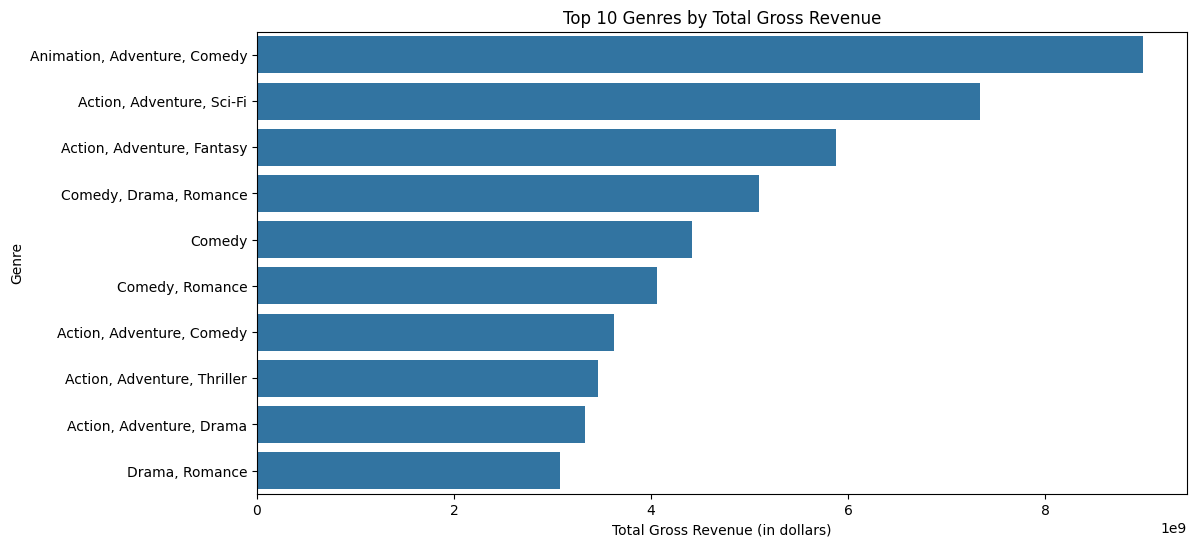

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_gross_per_genre_sorted.values, y=top_gross_per_genre_sorted.index)
plt.title("Top 10 Genres by Total Gross Revenue")
plt.xlabel("Total Gross Revenue (in dollars)")
plt.ylabel("Genre")
plt.show()


In [51]:
avg_duration = df.groupby('Release Year')['Duration'].mean()

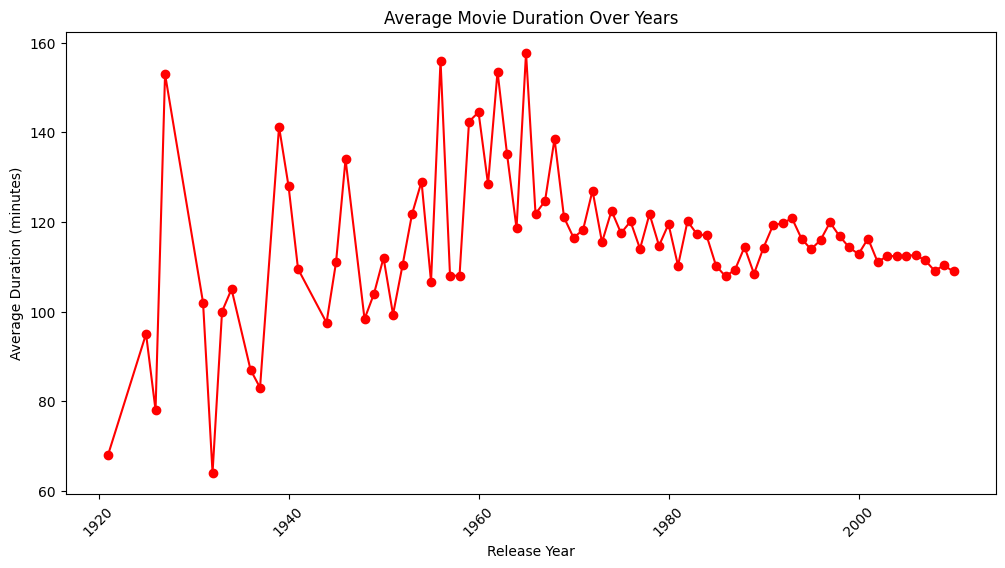

In [52]:
plt.figure(figsize=(12, 6))
avg_duration.plot(kind='line', marker='o', c='r')
plt.title("Average Movie Duration Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.xticks(rotation=45)
plt.show()

In [53]:
top_directors_gross = df.groupby('Director')['Gross'].sum().nlargest(10)

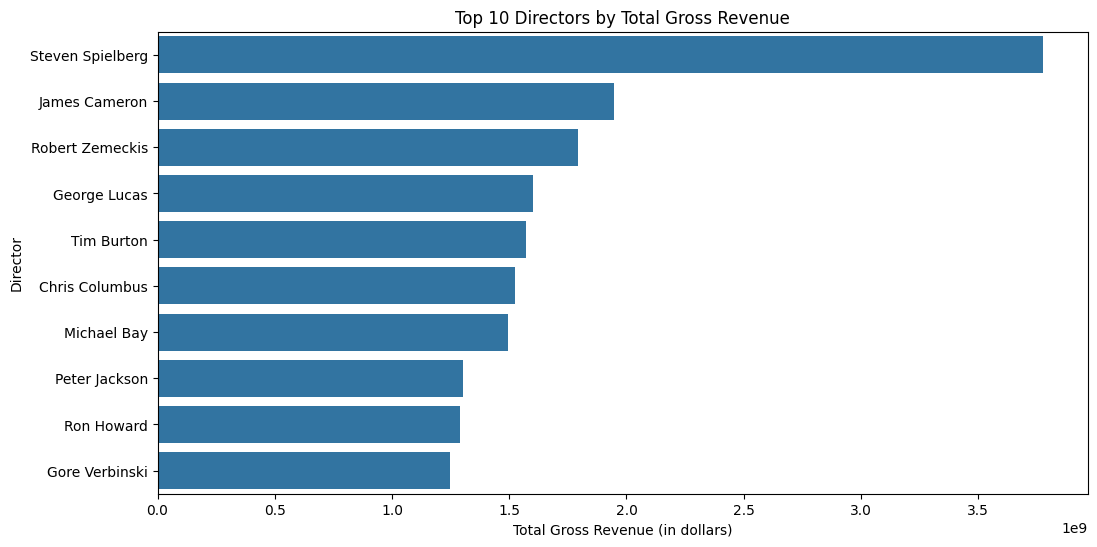

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors_gross.values, y=top_directors_gross.index)
plt.title("Top 10 Directors by Total Gross Revenue")
plt.xlabel("Total Gross Revenue (in dollars)")
plt.ylabel("Director")
plt.show()

##  Clustering

In [55]:
cluster_data=df[['Metascore', 'IMDB Rating', 'Gross']]

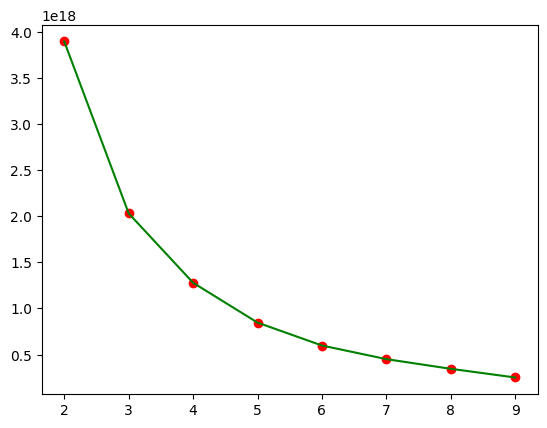

In [56]:
clust=range(2,10)
inertia=[]
for i in clust:
    cluster=KMeans(n_clusters=i)
    label=cluster.fit(cluster_data)
    inertia.append(cluster.inertia_)
    
      
plt.scatter(clust,inertia,c='r')
plt.plot(clust,inertia,c='g')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=3) 
df['clusters'] = kmeans.fit_predict(cluster_data)

In [58]:
fig = px.scatter_3d(df,x='Metascore',y='IMDB Rating',z='Gross',color='clusters',hover_name='Movie Name',title='3D Scatterplot',labels={'Metascore':'Metascore','IMDB Rating':'IMDB Rating','Gross':'Gross'})
  
fig.update_layout(scene=dict(xaxis_title='Metascore', yaxis_title='IMDB Rating',zaxis_title='Gross'),width=800,height=800)
fig.show()

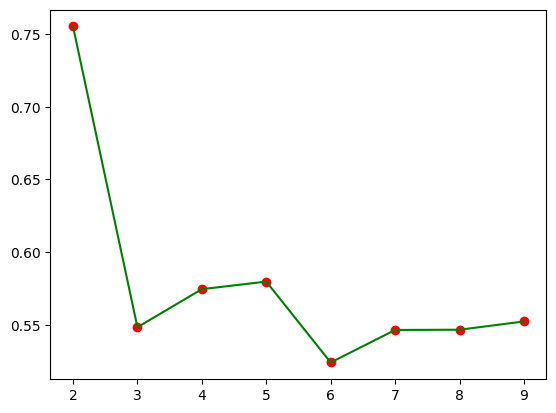

In [59]:
clust=range(2,10)
sil_scores = []

for i in clust:
    cluster = AgglomerativeClustering(n_clusters=i)
    labels = cluster.fit_predict(cluster_data)
    sil_scores.append(silhouette_score(cluster_data, labels))  
    
      
plt.scatter(clust,sil_scores,c='r')
plt.plot(clust,sil_scores,c='g')
plt.show()

In [60]:
cluster = AgglomerativeClustering(n_clusters=3) 
df['Aclusters'] = cluster.fit_predict(cluster_data)

In [61]:
fig = px.scatter_3d(df,x='Metascore',y='IMDB Rating',z='Gross',color='Aclusters',hover_name='Movie Name',title='3D Scatterplot',labels={'Metascore':'Metascore','IMDB Rating':'IMDB Rating','Gross':'Gross'})
  
fig.update_layout(scene=dict(xaxis_title='Metascore', yaxis_title='IMDB Rating',zaxis_title='Gross'),width=800,height=800)
fig.show()